In [14]:
import pandas as pd
import numpy as np
import datetime 
import holidays
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import fbprophet
from sklearn.externals import joblib
from collections import defaultdict
from sklearn.externals import joblib
import matplotlib.pyplot as plt
def seasonal_MASE(last_season, this_season, forecast):
    '''
    Parameters
    ----------
    last_season: array containing data for last season (size S)
    
    current_truth: array containing data for current season (size S)
    
    forecast: array containing data predictiing current season (size S)
    '''
    forecast_errors = np.abs(this_season - forecast)
    #print(forecast_errors)
    mean_absolute_forecast_error = np.average(forecast_errors)
    #print('forecast MAE', mean_absolute_forecast_error)
    
    naive = last_season
    naive.index = this_season.index
    naive_errors = np.abs(this_season - naive)
    #print(naive_errors)
    mean_absolute_naive_error = np.average(naive_errors)
    #print('naive MAE', mean_absolute_naive_error)
    
    return mean_absolute_forecast_error / mean_absolute_naive_error

In [6]:
ll = pd.read_csv('../datasets/tc.csv')
dr = pd.read_csv('../datasets/nights_2010-2017.csv',parse_dates=['date'], index_col='date',usecols=[*range(1, 15)])
regions = ll.Region
train_start = '2010-01-01'

In [11]:
all_smase = defaultdict(dict)
years_data = defaultdict(dict)
predicted_data = defaultdict(list)
for region in regions:
    for predict_year in range(2011,2018):
        print("Cross Validation Prophet Region:",region,"Prediction year:",predict_year)
        ld = []
        for holiday_year in range(2010,predict_year):
            for date, name in sorted(holidays.FRA(years=holiday_year).items()):
                ld.append(date.strftime('%Y-%m-%d'))
        train_end = str(predict_year-1)+'-12-01'
        predict_start = str(predict_year)+'-01-01'
        predict_end = str(predict_year)+'-12-01'
        dfr = dr.loc[train_start:predict_end,dr.columns.str.contains(""+region+"|daysoff")]
        df_train = dfr.loc[train_start:train_end,dfr.columns.str.startswith('nights')]
        df_test = dfr.loc[predict_start:predict_end ,dfr.columns.str.startswith('nights')]
        train = np.array(df_train)
        test = np.array(df_test)
        #Create & Fit Facebook model
        fb = pd.DataFrame()
        fb['ds'] = df_train.index
        fb['y'] = train
        holidays_exo = pd.DataFrame({  
            'holiday': 'france',
            'ds': pd.to_datetime(ld),
           })
        fb_prophet = fbprophet.Prophet(yearly_seasonality = True, seasonality_mode='multiplicative', seasonality_prior_scale=0.04, changepoint_prior_scale=0.1, holidays=holidays_exo, holidays_prior_scale=0.01)
        fb_prophet.fit(fb)
        fb_forecast = fb_prophet.make_future_dataframe(periods=12, freq='M')
        fb_forecast = fb_prophet.predict(fb_forecast)
        future_forecast= np.array(fb_forecast.tail(12).yhat)
        # --------Calculated error measures for each CV step----------
        years_data[region][predict_year]=df_train.index.strftime('%Y').unique().tolist()
        predicted_data[region].append(predict_year)
        lastyear_start = str(predict_year-1)+'-01-01'
        lastyear_end = str(predict_year-1)+'-12-01'
        forecast = pd.DataFrame(future_forecast,columns=['nights_'+region], index=df_test.index)
        all_smase[region][predict_year] = seasonal_MASE(dfr.loc[lastyear_start:lastyear_end,dfr.columns.str.contains('nights_'+region)], df_test, forecast )




INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


Cross Validation Prophet Region: ARA Prediction year: 2011


/home/aa/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:353: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  np.linspace(0, hist_size - 1, self.n_changepoints + 1)
/home/aa/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


             nights_ARA
date                   
2011-01-01  1249.676066
2011-02-01  1552.820356
2011-03-01  1825.296441
2011-04-01  1591.530717
2011-05-01  1549.546334
2011-06-01  2146.698974
2011-07-01  2973.216612
2011-08-01  3330.279311
2011-09-01  2737.961369
2011-10-01  2561.234660
2011-11-01  2397.392954
2011-12-01  3988.157840
forecast MAE 2325.317636225636
            nights_ARA
date                  
2011-01-01      125.96
2011-02-01       24.14
2011-03-01       81.75
2011-04-01       49.29
2011-05-01       19.96
2011-06-01      149.94
2011-07-01      130.85
2011-08-01      182.07
2011-09-01       92.17
2011-10-01      132.75
2011-11-01       92.34
2011-12-01       69.12
naive MAE 95.86166666666664
Cross Validation Prophet Region: ARA Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_ARA
date                  
2012-01-01   71.000129
2012-02-01   27.617769
2012-03-01   79.252557
2012-04-01  218.228413
2012-05-01  137.466977
2012-06-01  174.046137
2012-07-01  246.882293
2012-08-01  182.956336
2012-09-01  135.264082
2012-10-01  120.509758
2012-11-01    4.471760
2012-12-01   60.014577
forecast MAE 121.47589895014772
            nights_ARA
date                  
2012-01-01       67.59
2012-02-01      133.75
2012-03-01       65.58
2012-04-01       93.10
2012-05-01       26.67
2012-06-01       48.12
2012-07-01       65.55
2012-08-01       31.63
2012-09-01        8.79
2012-10-01       37.70
2012-11-01       93.78
2012-12-01       79.78
naive MAE 62.66999999999998
Cross Validation Prophet Region: ARA Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_ARA
date                  
2013-01-01   34.166820
2013-02-01   79.416875
2013-03-01  241.397395
2013-04-01  156.471814
2013-05-01   25.535894
2013-06-01   41.933181
2013-07-01   63.727705
2013-08-01    7.412290
2013-09-01   46.132293
2013-10-01   27.247760
2013-11-01   41.837201
2013-12-01   70.370646
forecast MAE 69.63748971060558
            nights_ARA
date                  
2013-01-01        4.29
2013-02-01       51.77
2013-03-01      263.21
2013-04-01       16.63
2013-05-01      113.28
2013-06-01       76.79
2013-07-01       98.92
2013-08-01       88.05
2013-09-01       24.54
2013-10-01       48.80
2013-11-01       45.61
2013-12-01       20.31
naive MAE 71.01666666666675
Cross Validation Prophet Region: ARA Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_ARA
date                  
2014-01-01  194.788052
2014-02-01  169.407769
2014-03-01  145.579970
2014-04-01  151.675171
2014-05-01  172.654730
2014-06-01  214.885490
2014-07-01  365.758765
2014-08-01   10.871196
2014-09-01  109.606333
2014-10-01   26.524716
2014-11-01  158.670146
2014-12-01   30.896299
forecast MAE 145.94321970132668
            nights_ARA
date                  
2014-01-01      102.89
2014-02-01       64.53
2014-03-01      312.77
2014-04-01       10.59
2014-05-01      145.00
2014-06-01      138.60
2014-07-01      271.12
2014-08-01       18.59
2014-09-01       67.09
2014-10-01        2.34
2014-11-01       92.02
2014-12-01       45.11
naive MAE 105.8875
Cross Validation Prophet Region: ARA Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_ARA
date                  
2015-01-01   98.099005
2015-02-01  217.685547
2015-03-01  120.576297
2015-04-01  116.448941
2015-05-01  130.614008
2015-06-01   76.522661
2015-07-01  132.304298
2015-08-01  236.024168
2015-09-01  159.537467
2015-10-01  125.495971
2015-11-01    8.875176
2015-12-01   54.607158
forecast MAE 123.06589121939271
            nights_ARA
date                  
2015-01-01      133.61
2015-02-01      203.26
2015-03-01       58.08
2015-04-01       95.43
2015-05-01      146.80
2015-06-01      104.49
2015-07-01      225.15
2015-08-01       24.51
2015-09-01       74.49
2015-10-01        5.25
2015-11-01       25.17
2015-12-01       72.70
naive MAE 97.41166666666663
Cross Validation Prophet Region: ARA Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_ARA
date                  
2016-01-01   21.323712
2016-02-01  194.630756
2016-03-01  174.060079
2016-04-01   10.190536
2016-05-01   70.042575
2016-06-01   32.523813
2016-07-01   61.787635
2016-08-01   48.809862
2016-09-01   20.979810
2016-10-01   73.300410
2016-11-01    5.808640
2016-12-01   49.739974
forecast MAE 63.599816685839606
            nights_ARA
date                  
2016-01-01       22.79
2016-02-01      154.39
2016-03-01      243.09
2016-04-01       37.21
2016-05-01       79.27
2016-06-01       98.01
2016-07-01      132.22
2016-08-01       27.63
2016-09-01       15.73
2016-10-01      107.99
2016-11-01       96.81
2016-12-01       54.00
naive MAE 89.09500000000007
Cross Validation Prophet Region: ARA Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


            nights_ARA
date                  
2017-01-01   70.605850
2017-02-01   13.495893
2017-03-01  157.108431
2017-04-01   36.661136
2017-05-01   84.671035
2017-06-01   78.112862
2017-07-01   45.375964
2017-08-01  104.641264
2017-09-01    1.321380
2017-10-01    0.443862
2017-11-01   18.428053
2017-12-01   94.062449
forecast MAE 58.744014808272766
            nights_ARA
date                  
2017-01-01       19.06
2017-02-01       74.02
2017-03-01      226.99
2017-04-01      101.66
2017-05-01       65.03
2017-06-01        0.65
2017-07-01       26.04
2017-08-01       60.88
2017-09-01       97.82
2017-10-01        1.60
2017-11-01       81.23
2017-12-01       39.65
naive MAE 66.21916666666662
Cross Validation Prophet Region: BFC Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


            nights_BFC
date                  
2011-01-01  279.045688
2011-02-01  257.796758
2011-03-01  195.325159
2011-04-01  124.811232
2011-05-01  117.638925
2011-06-01    6.440761
2011-07-01   33.828321
2011-08-01    4.087596
2011-09-01   81.953707
2011-10-01  179.864858
2011-11-01  288.476080
2011-12-01  332.966034
forecast MAE 158.5195933098229
            nights_BFC
date                  
2011-01-01       21.32
2011-02-01       18.80
2011-03-01        3.21
2011-04-01        6.07
2011-05-01       59.88
2011-06-01       49.25
2011-07-01        3.74
2011-08-01        4.36
2011-09-01        0.06
2011-10-01        1.11
2011-11-01       14.93
2011-12-01        6.38
naive MAE 15.759166666666681
Cross Validation Prophet Region: BFC Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_BFC
date                  
2012-01-01  141.611012
2012-02-01  148.854899
2012-03-01   91.867874
2012-04-01   87.870466
2012-05-01   24.150076
2012-06-01    6.362563
2012-07-01   36.487021
2012-08-01   11.106710
2012-09-01   15.613761
2012-10-01   84.368864
2012-11-01  107.259854
2012-12-01  157.986640
forecast MAE 76.1283116203287
            nights_BFC
date                  
2012-01-01        2.97
2012-02-01        7.95
2012-03-01        2.96
2012-04-01       41.03
2012-05-01       18.77
2012-06-01       51.13
2012-07-01       16.67
2012-08-01       24.36
2012-09-01       14.23
2012-10-01       32.71
2012-11-01        0.18
2012-12-01       25.70
naive MAE 19.88833333333334
Cross Validation Prophet Region: BFC Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_BFC
date                  
2013-01-01   26.028838
2013-02-01   20.778473
2013-03-01   39.853438
2013-04-01   25.097424
2013-05-01   32.558544
2013-06-01    1.077113
2013-07-01    2.657538
2013-08-01   19.493788
2013-09-01    2.179041
2013-10-01   19.949239
2013-11-01    8.212054
2013-12-01    2.690901
forecast MAE 16.714699154455328
            nights_BFC
date                  
2013-01-01       37.39
2013-02-01       21.26
2013-03-01       11.45
2013-04-01       22.37
2013-05-01       10.97
2013-06-01        9.62
2013-07-01       30.09
2013-08-01        0.06
2013-09-01       22.98
2013-10-01       17.70
2013-11-01       27.69
2013-12-01        5.86
naive MAE 18.120000000000005
Cross Validation Prophet Region: BFC Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_BFC
date                  
2014-01-01    5.331259
2014-02-01    3.315313
2014-03-01   11.019107
2014-04-01   25.636896
2014-05-01    6.584276
2014-06-01   21.365399
2014-07-01    8.943116
2014-08-01   48.541041
2014-09-01    5.970510
2014-10-01   22.504637
2014-11-01    2.281453
2014-12-01   28.628769
forecast MAE 15.843481405297515
            nights_BFC
date                  
2014-01-01       18.91
2014-02-01       16.91
2014-03-01       32.74
2014-04-01       40.93
2014-05-01       24.20
2014-06-01       16.59
2014-07-01       11.51
2014-08-01       28.01
2014-09-01        0.34
2014-10-01        3.96
2014-11-01       10.89
2014-12-01       25.90
naive MAE 19.240833333333356
Cross Validation Prophet Region: BFC Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_BFC
date                  
2015-01-01    4.484843
2015-02-01   30.862636
2015-03-01   13.849728
2015-04-01    5.508280
2015-05-01   53.593382
2015-06-01    7.103546
2015-07-01   20.138972
2015-08-01   45.744820
2015-09-01   19.107728
2015-10-01   29.801960
2015-11-01    3.802454
2015-12-01   23.567418
forecast MAE 21.463814118831024
            nights_BFC
date                  
2015-01-01       12.03
2015-02-01       39.34
2015-03-01       10.71
2015-04-01        0.71
2015-05-01       65.11
2015-06-01       13.84
2015-07-01       54.49
2015-08-01       35.52
2015-09-01       38.14
2015-10-01       34.36
2015-11-01       21.01
2015-12-01       18.98
naive MAE 28.686666666666664
Cross Validation Prophet Region: BFC Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_BFC
date                  
2016-01-01   23.634850
2016-02-01   10.505074
2016-03-01   21.506867
2016-04-01   40.089278
2016-05-01   20.541285
2016-06-01   70.805471
2016-07-01   41.976654
2016-08-01   57.501638
2016-09-01   69.721094
2016-10-01   37.485792
2016-11-01    5.946249
2016-12-01   14.692954
forecast MAE 34.53393386063285
            nights_BFC
date                  
2016-01-01        8.28
2016-02-01       15.76
2016-03-01       50.27
2016-04-01        5.26
2016-05-01        9.19
2016-06-01       25.33
2016-07-01        4.54
2016-08-01       29.49
2016-09-01       27.25
2016-10-01       13.24
2016-11-01       29.11
2016-12-01        0.80
naive MAE 18.209999999999997
Cross Validation Prophet Region: BFC Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


            nights_BFC
date                  
2017-01-01    5.110028
2017-02-01   14.066778
2017-03-01   24.815237
2017-04-01   35.983744
2017-05-01   14.928505
2017-06-01    6.321213
2017-07-01   23.829175
2017-08-01    1.312507
2017-09-01    8.315164
2017-10-01    7.425431
2017-11-01   22.493726
2017-12-01   21.773695
forecast MAE 15.531266828853594
            nights_BFC
date                  
2017-01-01       13.06
2017-02-01        5.19
2017-03-01       15.22
2017-04-01       52.40
2017-05-01       24.21
2017-06-01       29.68
2017-07-01       24.96
2017-08-01       12.70
2017-09-01       36.83
2017-10-01       11.11
2017-11-01        2.82
2017-12-01       14.00
naive MAE 20.181666666666647
Cross Validation Prophet Region: BRE Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


            nights_BRE
date                  
2011-01-01  378.526359
2011-02-01  332.387742
2011-03-01  241.968119
2011-04-01   93.709782
2011-05-01   98.498367
2011-06-01   54.007949
2011-07-01   77.708383
2011-08-01  196.298198
2011-09-01   63.984253
2011-10-01  196.382550
2011-11-01  373.724643
2011-12-01  447.623044
forecast MAE 212.9016158529112
            nights_BRE
date                  
2011-01-01       12.62
2011-02-01       24.46
2011-03-01       18.12
2011-04-01       39.75
2011-05-01       42.73
2011-06-01       87.66
2011-07-01       42.08
2011-08-01       17.03
2011-09-01        9.21
2011-10-01       65.94
2011-11-01       30.55
2011-12-01       23.84
naive MAE 34.49916666666665
Cross Validation Prophet Region: BRE Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_BRE
date                  
2012-01-01  309.150232
2012-02-01  288.364663
2012-03-01  182.557460
2012-04-01   88.366176
2012-05-01    1.543911
2012-06-01   11.212956
2012-07-01   73.596049
2012-08-01  172.876665
2012-09-01   14.279335
2012-10-01  190.650999
2012-11-01  236.772557
2012-12-01  326.160338
forecast MAE 157.9609449851179
            nights_BRE
date                  
2012-01-01       39.65
2012-02-01       17.18
2012-03-01       36.70
2012-04-01        8.21
2012-05-01       70.87
2012-06-01       59.95
2012-07-01       23.13
2012-08-01       19.94
2012-09-01       33.00
2012-10-01       61.67
2012-11-01       41.32
2012-12-01       13.62
naive MAE 35.43666666666665
Cross Validation Prophet Region: BRE Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_BRE
date                  
2013-01-01  265.010770
2013-02-01  260.469521
2013-03-01  155.126100
2013-04-01  127.590717
2013-05-01   33.802484
2013-06-01    0.572756
2013-07-01   57.168038
2013-08-01  242.643578
2013-09-01    4.726657
2013-10-01  104.270891
2013-11-01  176.451740
2013-12-01  239.545048
forecast MAE 138.94819166677456
            nights_BRE
date                  
2013-01-01       15.88
2013-02-01       27.08
2013-03-01       12.10
2013-04-01       62.95
2013-05-01       17.97
2013-06-01       23.79
2013-07-01       13.39
2013-08-01      103.51
2013-09-01       25.70
2013-10-01       28.53
2013-11-01        6.76
2013-12-01        4.50
naive MAE 28.51333333333332
Cross Validation Prophet Region: BRE Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_BRE
date                  
2014-01-01   15.690158
2014-02-01    9.253787
2014-03-01   42.132986
2014-04-01   33.891978
2014-05-01   25.146972
2014-06-01   40.822262
2014-07-01   35.565931
2014-08-01    7.809239
2014-09-01   14.551546
2014-10-01    1.414086
2014-11-01   34.883235
2014-12-01    4.659817
forecast MAE 22.151833093192806
            nights_BRE
date                  
2014-01-01       13.64
2014-02-01       31.26
2014-03-01       43.67
2014-04-01       27.10
2014-05-01       41.01
2014-06-01       12.63
2014-07-01       14.81
2014-08-01       36.89
2014-09-01        6.76
2014-10-01       22.97
2014-11-01       18.66
2014-12-01       10.03
naive MAE 23.28583333333334
Cross Validation Prophet Region: BRE Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_BRE
date                  
2015-01-01    3.283217
2015-02-01   15.874414
2015-03-01   49.665158
2015-04-01    8.055208
2015-05-01   41.597691
2015-06-01    4.149696
2015-07-01   44.631543
2015-08-01   23.229042
2015-09-01   61.036374
2015-10-01   22.596130
2015-11-01   27.744346
2015-12-01   25.351603
forecast MAE 27.267868648082427
            nights_BRE
date                  
2015-01-01       15.76
2015-02-01       21.60
2015-03-01       69.13
2015-04-01       22.77
2015-05-01       48.38
2015-06-01       26.33
2015-07-01       64.54
2015-08-01       11.84
2015-09-01       55.65
2015-10-01       14.47
2015-11-01        7.03
2015-12-01       22.39
naive MAE 31.65750000000001
Cross Validation Prophet Region: BRE Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_BRE
date                  
2016-01-01    9.755646
2016-02-01   16.313198
2016-03-01   36.064968
2016-04-01   33.112084
2016-05-01   19.446433
2016-06-01   45.818877
2016-07-01    0.422904
2016-08-01   63.503209
2016-09-01    4.148277
2016-10-01   42.181710
2016-11-01   18.798645
2016-12-01   17.654898
forecast MAE 25.601737427953413
            nights_BRE
date                  
2016-01-01        8.43
2016-02-01       25.79
2016-03-01       29.01
2016-04-01        2.21
2016-05-01        5.80
2016-06-01        6.34
2016-07-01       10.50
2016-08-01       15.53
2016-09-01        1.01
2016-10-01       58.94
2016-11-01       32.45
2016-12-01       20.33
naive MAE 18.028333333333318
Cross Validation Prophet Region: BRE Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


            nights_BRE
date                  
2017-01-01    9.652682
2017-02-01   13.838279
2017-03-01   29.056843
2017-04-01   59.246549
2017-05-01   21.011370
2017-06-01    2.252644
2017-07-01    2.218673
2017-08-01    7.910493
2017-09-01    1.666861
2017-10-01   14.710689
2017-11-01   16.655215
2017-12-01   14.381960
forecast MAE 16.05018807047888
            nights_BRE
date                  
2017-01-01       21.07
2017-02-01        3.29
2017-03-01        1.50
2017-04-01       92.85
2017-05-01        1.56
2017-06-01       48.19
2017-07-01       16.65
2017-08-01       61.56
2017-09-01       12.71
2017-10-01       14.23
2017-11-01       39.97
2017-12-01        5.56
naive MAE 26.594999999999985
Cross Validation Prophet Region: CVL Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


            nights_CVL
date                  
2011-01-01  251.311342
2011-02-01  275.463043
2011-03-01  206.424694
2011-04-01  118.071878
2011-05-01   70.623593
2011-06-01   22.322750
2011-07-01   71.425089
2011-08-01   29.368900
2011-09-01   96.354753
2011-10-01  175.979523
2011-11-01  291.706396
2011-12-01  344.421723
forecast MAE 162.78947375791083
            nights_CVL
date                  
2011-01-01       45.40
2011-02-01        7.14
2011-03-01       10.27
2011-04-01        7.93
2011-05-01       39.02
2011-06-01       33.65
2011-07-01       16.53
2011-08-01       12.32
2011-09-01       14.52
2011-10-01       12.85
2011-11-01       16.23
2011-12-01        8.82
naive MAE 18.723333333333354
Cross Validation Prophet Region: CVL Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_CVL
date                  
2012-01-01  199.191350
2012-02-01  186.230563
2012-03-01  145.781484
2012-04-01   42.119480
2012-05-01    3.727639
2012-06-01   20.336605
2012-07-01   78.431202
2012-08-01   49.166518
2012-09-01    7.039324
2012-10-01  105.716142
2012-11-01  152.659730
2012-12-01  231.736885
forecast MAE 101.84474336093935
            nights_CVL
date                  
2012-01-01        1.06
2012-02-01       29.52
2012-03-01        8.01
2012-04-01       28.78
2012-05-01       19.94
2012-06-01       40.15
2012-07-01       23.63
2012-08-01       21.92
2012-09-01       16.21
2012-10-01       20.33
2012-11-01       22.98
2012-12-01       14.83
naive MAE 20.613333333333333
Cross Validation Prophet Region: CVL Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_CVL
date                  
2013-01-01   24.461539
2013-02-01   20.180919
2013-03-01   22.336738
2013-04-01   35.445703
2013-05-01   21.256239
2013-06-01   17.140662
2013-07-01   17.299952
2013-08-01   17.262465
2013-09-01   17.037151
2013-10-01    4.714431
2013-11-01    3.893532
2013-12-01    0.525156
forecast MAE 16.796207350821813
            nights_CVL
date                  
2013-01-01       28.37
2013-02-01       34.41
2013-03-01       15.32
2013-04-01       66.50
2013-05-01       14.42
2013-06-01        8.65
2013-07-01       15.89
2013-08-01       25.54
2013-09-01       33.16
2013-10-01       11.56
2013-11-01       21.77
2013-12-01       11.51
naive MAE 23.92500000000001
Cross Validation Prophet Region: CVL Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_CVL
date                  
2014-01-01   24.594924
2014-02-01   14.248940
2014-03-01    9.909897
2014-04-01   20.625942
2014-05-01    7.625483
2014-06-01    1.085020
2014-07-01   24.619872
2014-08-01    3.094061
2014-09-01   11.819679
2014-10-01    7.009395
2014-11-01   30.498765
2014-12-01    3.080169
forecast MAE 13.184345693064165
            nights_CVL
date                  
2014-01-01        3.26
2014-02-01        0.21
2014-03-01       37.99
2014-04-01       39.12
2014-05-01       30.41
2014-06-01        7.17
2014-07-01       19.11
2014-08-01       26.65
2014-09-01       15.54
2014-10-01        2.75
2014-11-01       29.55
2014-12-01        7.41
naive MAE 18.264166666666664
Cross Validation Prophet Region: CVL Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_CVL
date                  
2015-01-01   13.829479
2015-02-01   17.771652
2015-03-01   13.081153
2015-04-01   14.574913
2015-05-01   17.940084
2015-06-01   15.107194
2015-07-01   19.097300
2015-08-01   50.410946
2015-09-01   54.357070
2015-10-01   47.406950
2015-11-01   24.258790
2015-12-01   22.015151
forecast MAE 25.82089001830118
            nights_CVL
date                  
2015-01-01        4.81
2015-02-01       26.18
2015-03-01        8.49
2015-04-01       13.61
2015-05-01       13.37
2015-06-01       24.73
2015-07-01       28.82
2015-08-01       42.00
2015-09-01       34.69
2015-10-01       34.66
2015-11-01        5.50
2015-12-01       20.16
naive MAE 21.418333333333326
Cross Validation Prophet Region: CVL Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_CVL
date                  
2016-01-01   21.574679
2016-02-01    3.608214
2016-03-01   29.093283
2016-04-01    4.552369
2016-05-01    8.413335
2016-06-01   38.235206
2016-07-01    7.392782
2016-08-01    3.909976
2016-09-01   21.053632
2016-10-01    6.436864
2016-11-01   18.965718
2016-12-01    0.077432
forecast MAE 13.609457525205874
            nights_CVL
date                  
2016-01-01        5.87
2016-02-01        0.69
2016-03-01       43.84
2016-04-01       12.73
2016-05-01       12.21
2016-06-01        7.14
2016-07-01       17.74
2016-08-01        0.58
2016-09-01       26.03
2016-10-01        0.61
2016-11-01       27.14
2016-12-01        3.67
naive MAE 13.187500000000009
Cross Validation Prophet Region: CVL Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


            nights_CVL
date                  
2017-01-01   17.959008
2017-02-01    5.143585
2017-03-01    3.370402
2017-04-01   40.718327
2017-05-01   22.290482
2017-06-01   15.448122
2017-07-01    5.543762
2017-08-01    5.943721
2017-09-01    2.095013
2017-10-01    0.976379
2017-11-01   12.772691
2017-12-01   20.981818
forecast MAE 12.770275918334454
            nights_CVL
date                  
2017-01-01        2.12
2017-02-01        1.13
2017-03-01       22.78
2017-04-01       47.66
2017-05-01        9.44
2017-06-01       26.46
2017-07-01       20.54
2017-08-01       16.76
2017-09-01       22.25
2017-10-01        0.06
2017-11-01       32.96
2017-12-01       24.61
naive MAE 18.897499999999994
Cross Validation Prophet Region: COR Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


            nights_COR
date                  
2011-01-01  311.533995
2011-02-01  313.106607
2011-03-01  301.695742
2011-04-01  178.998302
2011-05-01    8.717101
2011-06-01   80.633385
2011-07-01  102.770608
2011-08-01  185.208029
2011-09-01   54.978418
2011-10-01  246.044402
2011-11-01  391.653623
2011-12-01  406.847690
forecast MAE 215.18232518763958
            nights_COR
date                  
2011-01-01        0.58
2011-02-01        1.90
2011-03-01        4.78
2011-04-01        3.77
2011-05-01       25.32
2011-06-01       16.26
2011-07-01       27.38
2011-08-01       22.19
2011-09-01        3.97
2011-10-01        7.76
2011-11-01        6.12
2011-12-01        2.23
naive MAE 10.18833333333334
Cross Validation Prophet Region: COR Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_COR
date                  
2012-01-01  280.857982
2012-02-01  280.285642
2012-03-01  261.650214
2012-04-01  142.019736
2012-05-01   32.596495
2012-06-01  104.583738
2012-07-01  165.274453
2012-08-01  287.215246
2012-09-01  145.122897
2012-10-01  164.102029
2012-11-01  287.693953
2012-12-01  310.046261
forecast MAE 205.12072047585127
            nights_COR
date                  
2012-01-01        1.37
2012-02-01        2.01
2012-03-01        0.71
2012-04-01        8.27
2012-05-01        6.83
2012-06-01       29.13
2012-07-01        3.38
2012-08-01       39.65
2012-09-01       19.87
2012-10-01        0.15
2012-11-01       14.58
2012-12-01        3.36
naive MAE 10.775833333333324
Cross Validation Prophet Region: COR Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_COR
date                  
2013-01-01  267.661195
2013-02-01  265.044557
2013-03-01  237.938553
2013-04-01  143.257968
2013-05-01   81.069227
2013-06-01  135.139153
2013-07-01  180.069349
2013-08-01  306.588818
2013-09-01  155.169786
2013-10-01  124.876780
2013-11-01  261.598302
2013-12-01  275.891445
forecast MAE 202.85876092086684
            nights_COR
date                  
2013-01-01        4.27
2013-02-01        3.56
2013-03-01        2.05
2013-04-01       22.59
2013-05-01       28.97
2013-06-01        9.96
2013-07-01        5.66
2013-08-01        1.11
2013-09-01       13.41
2013-10-01        7.23
2013-11-01        8.17
2013-12-01        0.31
naive MAE 8.940833333333332
Cross Validation Prophet Region: COR Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_COR
date                  
2014-01-01  264.527028
2014-02-01  267.040114
2014-03-01  245.016978
2014-04-01  142.238816
2014-05-01   46.205165
2014-06-01  125.370719
2014-07-01  125.273951
2014-08-01  261.725178
2014-09-01  146.019608
2014-10-01  128.136299
2014-11-01  265.683410
2014-12-01  277.772486
forecast MAE 191.2508126035037
            nights_COR
date                  
2014-01-01        3.26
2014-02-01        2.07
2014-03-01        8.92
2014-04-01        0.24
2014-05-01       31.31
2014-06-01        6.52
2014-07-01       50.75
2014-08-01       37.18
2014-09-01        6.10
2014-10-01        7.37
2014-11-01       10.29
2014-12-01        7.17
naive MAE 14.264999999999993
Cross Validation Prophet Region: COR Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_COR
date                  
2015-01-01  259.287750
2015-02-01  259.260929
2015-03-01  238.416725
2015-04-01  148.909244
2015-05-01   69.039383
2015-06-01  138.389993
2015-07-01  188.070671
2015-08-01  291.352294
2015-09-01  171.125571
2015-10-01   88.737826
2015-11-01  246.333836
2015-12-01  262.640075
forecast MAE 196.79702476039407
            nights_COR
date                  
2015-01-01        2.91
2015-02-01        0.82
2015-03-01        4.76
2015-04-01       16.24
2015-05-01       19.17
2015-06-01       10.48
2015-07-01       60.17
2015-08-01       32.79
2015-09-01       23.00
2015-10-01       26.25
2015-11-01        2.90
2015-12-01        0.24
naive MAE 16.644166666666667
Cross Validation Prophet Region: COR Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_COR
date                  
2016-01-01  254.928022
2016-02-01  249.223101
2016-03-01  225.971063
2016-04-01  126.131379
2016-05-01   57.319581
2016-06-01  154.039609
2016-07-01  223.651705
2016-08-01  301.635894
2016-09-01  198.599271
2016-10-01   64.465099
2016-11-01  229.881377
2016-12-01  245.705040
forecast MAE 194.29592846587306
            nights_COR
date                  
2016-01-01        3.11
2016-02-01        2.35
2016-03-01        4.52
2016-04-01       14.29
2016-05-01       15.76
2016-06-01       11.85
2016-07-01       31.91
2016-08-01       10.70
2016-09-01       25.80
2016-10-01       14.90
2016-11-01        2.53
2016-12-01        3.81
naive MAE 11.794166666666664
Cross Validation Prophet Region: COR Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


            nights_COR
date                  
2017-01-01  249.232584
2017-02-01  246.356421
2017-03-01  219.740222
2017-04-01   85.868995
2017-05-01   59.869474
2017-06-01  164.699598
2017-07-01  219.339946
2017-08-01  316.298928
2017-09-01  209.206843
2017-10-01   57.010323
2017-11-01  221.839129
2017-12-01  243.936058
forecast MAE 191.1165433863197
            nights_COR
date                  
2017-01-01        3.83
2017-02-01        1.77
2017-03-01        3.28
2017-04-01       39.60
2017-05-01        7.35
2017-06-01       17.27
2017-07-01        4.67
2017-08-01       26.77
2017-09-01       18.77
2017-10-01        7.19
2017-11-01        4.85
2017-12-01        0.22
naive MAE 11.297500000000001
Cross Validation Prophet Region: IDF Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


             nights_IDF
date                   
2011-01-01   208.365008
2011-02-01   245.456025
2011-03-01    45.944620
2011-04-01    55.563891
2011-05-01   886.775102
2011-06-01  1297.471079
2011-07-01  1630.879865
2011-08-01  1740.391574
2011-09-01  2153.919764
2011-10-01  1939.913040
2011-11-01  1254.266792
2011-12-01  1554.494086
forecast MAE 1084.4534037990425
            nights_IDF
date                  
2011-01-01      174.63
2011-02-01       17.65
2011-03-01       99.93
2011-04-01      515.19
2011-05-01       33.43
2011-06-01      207.97
2011-07-01      313.16
2011-08-01      259.24
2011-09-01       74.27
2011-10-01      146.60
2011-11-01      214.97
2011-12-01      125.28
naive MAE 181.86000000000013
Cross Validation Prophet Region: IDF Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_IDF
date                  
2012-01-01  116.318350
2012-02-01   75.575927
2012-03-01  191.873645
2012-04-01   24.521564
2012-05-01  299.826312
2012-06-01   96.464552
2012-07-01  201.666263
2012-08-01  192.377089
2012-09-01  323.396439
2012-10-01  228.593007
2012-11-01   85.990711
2012-12-01  229.173804
forecast MAE 172.1481384737812
            nights_IDF
date                  
2012-01-01       16.14
2012-02-01      141.09
2012-03-01        6.04
2012-04-01       47.92
2012-05-01       12.38
2012-06-01       74.61
2012-07-01       58.40
2012-08-01       48.08
2012-09-01       82.53
2012-10-01       23.73
2012-11-01       57.72
2012-12-01       54.75
naive MAE 51.94916666666669
Cross Validation Prophet Region: IDF Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_IDF
date                  
2013-01-01  232.999598
2013-02-01   52.623182
2013-03-01   14.378377
2013-04-01  204.566464
2013-05-01   36.618706
2013-06-01   81.007216
2013-07-01  271.962802
2013-08-01  285.664072
2013-09-01  121.491952
2013-10-01   83.397454
2013-11-01    6.160911
2013-12-01   45.214346
forecast MAE 119.67375667354592
            nights_IDF
date                  
2013-01-01      204.33
2013-02-01       45.22
2013-03-01       49.60
2013-04-01      363.96
2013-05-01      147.47
2013-06-01       14.25
2013-07-01      281.53
2013-08-01      282.63
2013-09-01        7.67
2013-10-01       74.78
2013-11-01       96.74
2013-12-01       16.50
naive MAE 132.0566666666667
Cross Validation Prophet Region: IDF Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_IDF
date                  
2014-01-01  128.622923
2014-02-01   77.975328
2014-03-01  234.524073
2014-04-01  125.767309
2014-05-01  169.552197
2014-06-01  157.557661
2014-07-01  179.978976
2014-08-01  396.404458
2014-09-01  248.586590
2014-10-01   12.975309
2014-11-01  229.586794
2014-12-01   73.459395
forecast MAE 169.58258430715242
            nights_IDF
date                  
2014-01-01       92.95
2014-02-01      158.23
2014-03-01      277.88
2014-04-01      246.22
2014-05-01      207.41
2014-06-01      283.39
2014-07-01        4.00
2014-08-01      120.87
2014-09-01      182.36
2014-10-01       31.59
2014-11-01      219.92
2014-12-01       52.15
naive MAE 156.4141666666666
Cross Validation Prophet Region: IDF Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_IDF
date                  
2015-01-01   20.945080
2015-02-01   89.844215
2015-03-01  243.596267
2015-04-01   55.275891
2015-05-01   11.350407
2015-06-01  147.818590
2015-07-01  323.504248
2015-08-01  371.294001
2015-09-01  101.674220
2015-10-01   95.758439
2015-11-01  437.150502
2015-12-01  637.275955
forecast MAE 211.29065133081113
            nights_IDF
date                  
2015-01-01       82.11
2015-02-01      106.26
2015-03-01      134.39
2015-04-01      229.75
2015-05-01       37.81
2015-06-01      169.73
2015-07-01      389.76
2015-08-01        3.81
2015-09-01      228.25
2015-10-01       10.43
2015-11-01      329.50
2015-12-01      761.72
naive MAE 206.96000000000004
Cross Validation Prophet Region: IDF Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_IDF
date                  
2016-01-01  429.341584
2016-02-01  330.472211
2016-03-01  176.296263
2016-04-01  773.152072
2016-05-01  485.152646
2016-06-01  487.757856
2016-07-01  538.451843
2016-08-01  940.800723
2016-09-01  376.048409
2016-10-01  214.192676
2016-11-01   15.170612
2016-12-01  165.533148
forecast MAE 411.03083685400134
            nights_IDF
date                  
2016-01-01      451.91
2016-02-01      379.34
2016-03-01       10.03
2016-04-01      763.78
2016-05-01      527.06
2016-06-01      631.83
2016-07-01      869.15
2016-08-01     1298.69
2016-09-01      526.71
2016-10-01      338.16
2016-11-01      353.18
2016-12-01      649.38
naive MAE 566.6016666666668
Cross Validation Prophet Region: IDF Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


             nights_IDF
date                   
2017-01-01   729.477179
2017-02-01   481.787463
2017-03-01   582.459677
2017-04-01   884.110317
2017-05-01   550.779506
2017-06-01   874.523070
2017-07-01   912.047094
2017-08-01   456.506141
2017-09-01   875.083601
2017-10-01   931.915410
2017-11-01  1124.369333
2017-12-01  1215.763964
forecast MAE 801.5685630214124
            nights_IDF
date                  
2017-01-01      677.87
2017-02-01      371.10
2017-03-01      234.72
2017-04-01     1013.92
2017-05-01      334.74
2017-06-01      642.02
2017-07-01      683.37
2017-08-01      644.58
2017-09-01      546.01
2017-10-01      419.71
2017-11-01      522.75
2017-12-01      439.89
naive MAE 544.2233333333332
Cross Validation Prophet Region: NAQ Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


            nights_NAQ
date                  
2011-01-01  802.707463
2011-02-01  745.813528
2011-03-01  518.318541
2011-04-01  228.779183
2011-05-01  205.625162
2011-06-01   18.485511
2011-07-01  213.053273
2011-08-01  439.985338
2011-09-01  137.607630
2011-10-01  449.392049
2011-11-01  843.504934
2011-12-01  996.312832
forecast MAE 466.6321203742098
            nights_NAQ
date                  
2011-01-01       18.35
2011-02-01        9.32
2011-03-01       51.74
2011-04-01       87.82
2011-05-01        6.43
2011-06-01      190.38
2011-07-01       63.94
2011-08-01       50.72
2011-09-01       69.81
2011-10-01       68.92
2011-11-01       16.39
2011-12-01        5.24
naive MAE 53.255000000000024
Cross Validation Prophet Region: NAQ Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_NAQ
date                  
2012-01-01  692.549910
2012-02-01  635.585971
2012-03-01  449.954024
2012-04-01  257.538036
2012-05-01   88.996372
2012-06-01   41.653796
2012-07-01  211.523593
2012-08-01  446.668742
2012-09-01   11.704230
2012-10-01  329.264531
2012-11-01  490.178161
2012-12-01  686.121369
forecast MAE 361.8115612475686
            nights_NAQ
date                  
2012-01-01        8.63
2012-02-01       11.80
2012-03-01       14.02
2012-04-01       92.30
2012-05-01       18.93
2012-06-01      149.90
2012-07-01       58.05
2012-08-01        1.05
2012-09-01       11.68
2012-10-01       76.80
2012-11-01       84.16
2012-12-01       14.99
naive MAE 45.19250000000002
Cross Validation Prophet Region: NAQ Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_NAQ
date                  
2013-01-01  526.452910
2013-02-01  516.902391
2013-03-01  300.629935
2013-04-01  263.671748
2013-05-01   54.623735
2013-06-01    6.049184
2013-07-01  154.174793
2013-08-01  459.168349
2013-09-01    8.346661
2013-10-01  166.725604
2013-11-01  389.752830
2013-12-01  503.907278
forecast MAE 279.20045149946304
            nights_NAQ
date                  
2013-01-01       33.61
2013-02-01        0.61
2013-03-01       55.03
2013-04-01       72.06
2013-05-01       93.37
2013-06-01        0.59
2013-07-01       42.17
2013-08-01       78.15
2013-09-01       32.00
2013-10-01       51.20
2013-11-01       39.88
2013-12-01       11.55
naive MAE 42.51833333333338
Cross Validation Prophet Region: NAQ Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_NAQ
date                  
2014-01-01   40.322490
2014-02-01   54.561319
2014-03-01   18.380016
2014-04-01   73.866620
2014-05-01   48.622690
2014-06-01   60.142191
2014-07-01  111.337503
2014-08-01   19.846676
2014-09-01   26.567195
2014-10-01   25.470120
2014-11-01   99.533597
2014-12-01    1.010834
forecast MAE 48.30510425792561
            nights_NAQ
date                  
2014-01-01       13.31
2014-02-01       16.12
2014-03-01       66.86
2014-04-01       22.86
2014-05-01      109.42
2014-06-01        3.14
2014-07-01       13.39
2014-08-01       65.78
2014-09-01        1.87
2014-10-01        4.65
2014-11-01       61.48
2014-12-01       22.19
naive MAE 33.422500000000014
Cross Validation Prophet Region: NAQ Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_NAQ
date                  
2015-01-01    6.605706
2015-02-01   31.971050
2015-03-01   35.692386
2015-04-01   92.784921
2015-05-01   81.398868
2015-06-01   46.111506
2015-07-01   90.260646
2015-08-01  147.870961
2015-09-01   89.485246
2015-10-01  116.763619
2015-11-01   31.573303
2015-12-01   81.950322
forecast MAE 71.03904450040353
            nights_NAQ
date                  
2015-01-01       14.70
2015-02-01       61.60
2015-03-01       10.49
2015-04-01      108.57
2015-05-01       70.52
2015-06-01       51.86
2015-07-01      128.79
2015-08-01       87.31
2015-09-01       53.74
2015-10-01       97.88
2015-11-01       18.44
2015-12-01       60.65
naive MAE 63.712499999999984
Cross Validation Prophet Region: NAQ Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_NAQ
date                  
2016-01-01   49.498723
2016-02-01    5.904757
2016-03-01   29.265496
2016-04-01   58.186920
2016-05-01   60.605460
2016-06-01   76.634398
2016-07-01    9.485467
2016-08-01   73.076958
2016-09-01   61.510184
2016-10-01   75.511282
2016-11-01   37.402599
2016-12-01   24.312887
forecast MAE 46.78292765124294
            nights_NAQ
date                  
2016-01-01       10.91
2016-02-01       38.12
2016-03-01       86.28
2016-04-01       27.64
2016-05-01        6.53
2016-06-01        8.81
2016-07-01       91.62
2016-08-01       19.07
2016-09-01       18.60
2016-10-01       99.26
2016-11-01       78.23
2016-12-01       31.33
naive MAE 43.033333333333324
Cross Validation Prophet Region: NAQ Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


            nights_NAQ
date                  
2017-01-01   37.277938
2017-02-01   53.112039
2017-03-01    6.391641
2017-04-01  116.508412
2017-05-01   99.330379
2017-06-01   82.846106
2017-07-01   29.981478
2017-08-01   77.476997
2017-09-01   61.400479
2017-10-01    3.872003
2017-11-01   32.188366
2017-12-01   12.526662
forecast MAE 51.07604170701692
            nights_NAQ
date                  
2017-01-01       20.15
2017-02-01       64.72
2017-03-01        7.46
2017-04-01      192.10
2017-05-01       20.73
2017-06-01       23.98
2017-07-01       11.75
2017-08-01       40.22
2017-09-01       28.46
2017-10-01       39.75
2017-11-01       25.67
2017-12-01        9.60
naive MAE 40.38250000000003
Cross Validation Prophet Region: NOR Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


            nights_NOR
date                  
2011-01-01  343.942503
2011-02-01  289.422198
2011-03-01  217.171332
2011-04-01   26.830940
2011-05-01   39.938193
2011-06-01   77.574419
2011-07-01   66.026548
2011-08-01  121.178760
2011-09-01   52.948810
2011-10-01  118.406083
2011-11-01  322.996957
2011-12-01  401.398478
forecast MAE 173.15293496438255
            nights_NOR
date                  
2011-01-01        8.71
2011-02-01       34.61
2011-03-01        8.74
2011-04-01       47.49
2011-05-01       37.88
2011-06-01       69.43
2011-07-01       36.14
2011-08-01       36.46
2011-09-01        9.54
2011-10-01       70.40
2011-11-01       34.89
2011-12-01       36.63
naive MAE 35.91000000000001
Cross Validation Prophet Region: NOR Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_NOR
date                  
2012-01-01  273.542471
2012-02-01  244.129747
2012-03-01  133.099957
2012-04-01   82.145390
2012-05-01   15.147376
2012-06-01    2.269732
2012-07-01   49.977208
2012-08-01  100.459616
2012-09-01    0.899507
2012-10-01  145.409086
2012-11-01  181.624613
2012-12-01  265.219066
forecast MAE 124.49364734339603
            nights_NOR
date                  
2012-01-01       12.43
2012-02-01        2.33
2012-03-01       45.85
2012-04-01       54.84
2012-05-01       40.71
2012-06-01       74.40
2012-07-01       11.70
2012-08-01        6.55
2012-09-01       21.84
2012-10-01       77.72
2012-11-01       33.44
2012-12-01        5.80
naive MAE 32.30083333333335
Cross Validation Prophet Region: NOR Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_NOR
date                  
2013-01-01   27.713232
2013-02-01   39.750934
2013-03-01   27.594543
2013-04-01   91.847576
2013-05-01   37.347956
2013-06-01    5.219055
2013-07-01   18.666389
2013-08-01   61.206884
2013-09-01   33.168695
2013-10-01   16.682677
2013-11-01    2.822544
2013-12-01    5.735827
forecast MAE 30.646359471192756
            nights_NOR
date                  
2013-01-01       17.38
2013-02-01       33.19
2013-03-01        7.78
2013-04-01       75.18
2013-05-01       15.24
2013-06-01       24.73
2013-07-01       33.27
2013-08-01       57.82
2013-09-01       52.74
2013-10-01       15.39
2013-11-01       19.34
2013-12-01       10.20
naive MAE 30.18833333333336
Cross Validation Prophet Region: NOR Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_NOR
date                  
2014-01-01   28.236473
2014-02-01   21.889904
2014-03-01    8.854007
2014-04-01   15.911662
2014-05-01   11.220472
2014-06-01   26.388508
2014-07-01   16.800620
2014-08-01   41.098121
2014-09-01   27.679070
2014-10-01    1.493563
2014-11-01   26.344486
2014-12-01    6.508931
forecast MAE 19.368818120256833
            nights_NOR
date                  
2014-01-01        3.14
2014-02-01       14.75
2014-03-01       34.68
2014-04-01       55.42
2014-05-01       36.18
2014-06-01       24.70
2014-07-01       24.97
2014-08-01        2.81
2014-09-01       55.33
2014-10-01       19.79
2014-11-01       18.57
2014-12-01        2.23
naive MAE 24.380833333333346
Cross Validation Prophet Region: NOR Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_NOR
date                  
2015-01-01   24.439406
2015-02-01   14.388195
2015-03-01    1.790383
2015-04-01    1.216450
2015-05-01   23.421086
2015-06-01   19.558984
2015-07-01    2.496859
2015-08-01   36.867063
2015-09-01   26.176374
2015-10-01   34.614903
2015-11-01   61.025260
2015-12-01   11.087413
forecast MAE 21.42353148515593
            nights_NOR
date                  
2015-01-01        3.80
2015-02-01        8.43
2015-03-01        3.93
2015-04-01       16.63
2015-05-01       37.10
2015-06-01       31.42
2015-07-01       28.34
2015-08-01       58.26
2015-09-01       41.10
2015-10-01       27.36
2015-11-01       33.81
2015-12-01       19.71
naive MAE 25.824166666666674
Cross Validation Prophet Region: NOR Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_NOR
date                  
2016-01-01   27.457212
2016-02-01    2.252079
2016-03-01   28.280118
2016-04-01   44.532981
2016-05-01    6.936036
2016-06-01   56.152577
2016-07-01   31.904233
2016-08-01    8.256508
2016-09-01   21.062556
2016-10-01   57.712125
2016-11-01    7.698750
2016-12-01   39.181081
forecast MAE 27.61885464648687
            nights_NOR
date                  
2016-01-01        8.92
2016-02-01        5.27
2016-03-01       25.47
2016-04-01       54.26
2016-05-01       33.08
2016-06-01       56.80
2016-07-01        8.21
2016-08-01       17.38
2016-09-01       26.81
2016-10-01       69.39
2016-11-01       47.98
2016-12-01       19.62
naive MAE 31.09916666666665
Cross Validation Prophet Region: NOR Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


            nights_NOR
date                  
2017-01-01    5.694211
2017-02-01   22.482262
2017-03-01   18.018164
2017-04-01   94.441952
2017-05-01    2.658085
2017-06-01   18.778715
2017-07-01   16.862353
2017-08-01    5.787126
2017-09-01   17.541619
2017-10-01   19.372198
2017-11-01   32.052885
2017-12-01   29.162099
forecast MAE 23.570972299032917
            nights_NOR
date                  
2017-01-01       29.03
2017-02-01       23.61
2017-03-01        9.09
2017-04-01      136.06
2017-05-01       10.10
2017-06-01       75.20
2017-07-01        2.36
2017-08-01        7.38
2017-09-01        6.51
2017-10-01       23.17
2017-11-01       32.11
2017-12-01        1.38
naive MAE 29.666666666666668
Cross Validation Prophet Region: GES Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


            nights_GES
date                  
2011-01-01   86.670698
2011-02-01  255.973283
2011-03-01  197.741183
2011-04-01  163.913722
2011-05-01  151.933604
2011-06-01  134.658122
2011-07-01  159.195566
2011-08-01  121.778864
2011-09-01  112.018889
2011-10-01   80.925706
2011-11-01   75.692692
2011-12-01   65.216985
forecast MAE 133.8099428149619
            nights_GES
date                  
2011-01-01       34.12
2011-02-01        1.44
2011-03-01       45.63
2011-04-01       70.58
2011-05-01       42.62
2011-06-01      107.68
2011-07-01       73.21
2011-08-01       79.86
2011-09-01       44.46
2011-10-01       48.31
2011-11-01       33.99
2011-12-01       64.93
naive MAE 53.90250000000001
Cross Validation Prophet Region: GES Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_GES
date                  
2012-01-01   34.257635
2012-02-01   27.667450
2012-03-01   56.363400
2012-04-01   86.605563
2012-05-01   57.178396
2012-06-01  102.825298
2012-07-01   74.881172
2012-08-01  110.507582
2012-09-01   67.173455
2012-10-01   94.474742
2012-11-01    6.087474
2012-12-01   70.663770
forecast MAE 65.72382803422086
            nights_GES
date                  
2012-01-01        7.09
2012-02-01       39.65
2012-03-01       10.98
2012-04-01       42.66
2012-05-01       48.66
2012-06-01       63.54
2012-07-01       13.81
2012-08-01       47.44
2012-09-01        6.23
2012-10-01       30.69
2012-11-01       66.02
2012-12-01       15.23
naive MAE 32.666666666666664
Cross Validation Prophet Region: GES Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_GES
date                  
2013-01-01   13.340235
2013-02-01    2.494093
2013-03-01   36.417620
2013-04-01   34.192320
2013-05-01   70.634595
2013-06-01   34.392579
2013-07-01   31.961788
2013-08-01    7.674166
2013-09-01   39.042405
2013-10-01   13.325369
2013-11-01   11.488687
2013-12-01    0.916831
forecast MAE 24.65672402895956
            nights_GES
date                  
2013-01-01        2.20
2013-02-01        3.54
2013-03-01       57.65
2013-04-01        9.27
2013-05-01       80.39
2013-06-01       15.71
2013-07-01       57.30
2013-08-01       64.35
2013-09-01       15.93
2013-10-01       67.73
2013-11-01        9.35
2013-12-01       37.63
naive MAE 35.08750000000003
Cross Validation Prophet Region: GES Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_GES
date                  
2014-01-01   11.443921
2014-02-01   38.088701
2014-03-01   69.580961
2014-04-01   31.172891
2014-05-01   44.740535
2014-06-01   43.492999
2014-07-01   48.824344
2014-08-01    9.340243
2014-09-01   43.896225
2014-10-01   39.290172
2014-11-01   65.672061
2014-12-01   30.886099
forecast MAE 39.702429259090735
            nights_GES
date                  
2014-01-01       27.76
2014-02-01        9.13
2014-03-01       71.96
2014-04-01       31.85
2014-05-01       62.10
2014-06-01       25.22
2014-07-01       30.46
2014-08-01       50.56
2014-09-01       29.17
2014-10-01       10.10
2014-11-01       38.56
2014-12-01       68.09
naive MAE 37.91333333333336
Cross Validation Prophet Region: GES Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_GES
date                  
2015-01-01   12.527176
2015-02-01    3.681908
2015-03-01   39.073334
2015-04-01   42.880993
2015-05-01   47.970005
2015-06-01   55.031296
2015-07-01    8.147183
2015-08-01   14.651071
2015-09-01   37.591811
2015-10-01   31.499975
2015-11-01   58.066871
2015-12-01    7.481607
forecast MAE 29.8836024962289
            nights_GES
date                  
2015-01-01        2.08
2015-02-01       33.18
2015-03-01       11.03
2015-04-01       19.51
2015-05-01       76.99
2015-06-01       23.31
2015-07-01       29.59
2015-08-01       20.00
2015-09-01        6.91
2015-10-01        3.36
2015-11-01        7.93
2015-12-01       32.83
naive MAE 22.226666666666677
Cross Validation Prophet Region: GES Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_GES
date                  
2016-01-01   29.380773
2016-02-01   26.132211
2016-03-01   68.907556
2016-04-01   46.463851
2016-05-01   24.300738
2016-06-01   42.383781
2016-07-01   21.794127
2016-08-01   31.213694
2016-09-01   36.829627
2016-10-01   62.361059
2016-11-01   29.747628
2016-12-01   54.347072
forecast MAE 39.488509687001375
            nights_GES
date                  
2016-01-01       18.14
2016-02-01       32.95
2016-03-01      101.65
2016-04-01       16.57
2016-05-01        5.75
2016-06-01        5.95
2016-07-01       22.53
2016-08-01       30.34
2016-09-01       14.48
2016-10-01       77.92
2016-11-01       71.40
2016-12-01       51.51
naive MAE 37.43250000000001
Cross Validation Prophet Region: GES Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


            nights_GES
date                  
2017-01-01   14.540524
2017-02-01   28.887183
2017-03-01   20.988098
2017-04-01   95.881902
2017-05-01   17.824526
2017-06-01   28.343872
2017-07-01   79.263287
2017-08-01   62.909285
2017-09-01   19.750648
2017-10-01   32.347471
2017-11-01   88.391758
2017-12-01   87.119123
forecast MAE 48.0206397711473
            nights_GES
date                  
2017-01-01       48.48
2017-02-01       16.10
2017-03-01       34.70
2017-04-01      152.63
2017-05-01       29.82
2017-06-01       83.87
2017-07-01       77.57
2017-08-01      115.13
2017-09-01       75.74
2017-10-01        5.50
2017-11-01       76.80
2017-12-01       59.19
naive MAE 64.62749999999998
Cross Validation Prophet Region: HDF Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


            nights_HDF
date                  
2011-01-01  103.828370
2011-02-01    5.758478
2011-03-01  113.950042
2011-04-01  131.106522
2011-05-01  175.885369
2011-06-01  215.746720
2011-07-01  220.181381
2011-08-01  218.799428
2011-09-01  240.533724
2011-10-01  279.201343
2011-11-01  263.474602
2011-12-01  211.053371
forecast MAE 181.62661248148288
            nights_HDF
date                  
2011-01-01       42.65
2011-02-01        9.27
2011-03-01       10.66
2011-04-01       15.31
2011-05-01       28.64
2011-06-01       55.65
2011-07-01        5.55
2011-08-01        7.94
2011-09-01        4.78
2011-10-01       31.74
2011-11-01       12.18
2011-12-01        8.87
naive MAE 19.436666666666692
Cross Validation Prophet Region: HDF Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_HDF
date                  
2012-01-01   16.150685
2012-02-01   23.617786
2012-03-01    2.983933
2012-04-01   11.106127
2012-05-01   32.139441
2012-06-01   46.050727
2012-07-01   63.043063
2012-08-01   15.932463
2012-09-01   17.763572
2012-10-01   28.309957
2012-11-01   38.185074
2012-12-01   24.995546
forecast MAE 26.68986441813035
            nights_HDF
date                  
2012-01-01        9.79
2012-02-01        5.61
2012-03-01        9.82
2012-04-01        0.53
2012-05-01        0.09
2012-06-01       53.06
2012-07-01       46.77
2012-08-01        0.66
2012-09-01        3.89
2012-10-01       24.72
2012-11-01       50.58
2012-12-01       35.10
naive MAE 20.051666666666673
Cross Validation Prophet Region: HDF Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_HDF
date                  
2013-01-01   23.928819
2013-02-01   33.577742
2013-03-01    0.019226
2013-04-01   58.584537
2013-05-01    2.078758
2013-06-01   58.687832
2013-07-01   30.781692
2013-08-01    3.858933
2013-09-01   56.557524
2013-10-01   37.272441
2013-11-01    1.804400
2013-12-01   33.598576
forecast MAE 28.395873395154222
            nights_HDF
date                  
2013-01-01        6.95
2013-02-01        7.79
2013-03-01       10.93
2013-04-01       38.40
2013-05-01       37.22
2013-06-01        4.84
2013-07-01       40.23
2013-08-01       39.36
2013-09-01       14.92
2013-10-01       15.18
2013-11-01        2.37
2013-12-01       26.05
naive MAE 20.353333333333328
Cross Validation Prophet Region: HDF Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_HDF
date                  
2014-01-01   30.869853
2014-02-01    7.882986
2014-03-01    8.800729
2014-04-01   11.877910
2014-05-01   20.204030
2014-06-01    8.290846
2014-07-01   17.793666
2014-08-01   43.236406
2014-09-01   17.312844
2014-10-01   24.694179
2014-11-01    0.221414
2014-12-01    6.607842
forecast MAE 16.482725472302107
            nights_HDF
date                  
2014-01-01        6.18
2014-02-01       17.20
2014-03-01       19.32
2014-04-01       47.81
2014-05-01       14.94
2014-06-01       26.08
2014-07-01        4.12
2014-08-01       28.10
2014-09-01       49.67
2014-10-01       41.96
2014-11-01        9.81
2014-12-01       18.37
naive MAE 23.629999999999992
Cross Validation Prophet Region: HDF Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_HDF
date                  
2015-01-01    5.167407
2015-02-01   10.760055
2015-03-01   18.123969
2015-04-01    3.638177
2015-05-01    0.016850
2015-06-01   38.600767
2015-07-01    7.504256
2015-08-01   21.026029
2015-09-01    6.297790
2015-10-01    2.145344
2015-11-01    1.698303
2015-12-01   38.950433
forecast MAE 12.827448370315087
            nights_HDF
date                  
2015-01-01       41.01
2015-02-01       16.77
2015-03-01        5.08
2015-04-01       17.25
2015-05-01       11.62
2015-06-01        1.59
2015-07-01       39.39
2015-08-01       22.44
2015-09-01       26.53
2015-10-01       16.39
2015-11-01       21.94
2015-12-01       56.36
naive MAE 23.03083333333331
Cross Validation Prophet Region: HDF Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_HDF
date                  
2016-01-01   21.978587
2016-02-01   25.535991
2016-03-01   32.426696
2016-04-01   17.392048
2016-05-01    1.397011
2016-06-01   16.614495
2016-07-01   18.577365
2016-08-01   40.821046
2016-09-01   48.203220
2016-10-01   17.004842
2016-11-01   26.330358
2016-12-01    1.759218
forecast MAE 22.33673961080122
            nights_HDF
date                  
2016-01-01       41.98
2016-02-01       49.88
2016-03-01       68.60
2016-04-01        2.18
2016-05-01       27.05
2016-06-01       66.84
2016-07-01        6.19
2016-08-01        4.52
2016-09-01       35.15
2016-10-01        3.73
2016-11-01        3.71
2016-12-01       16.32
naive MAE 27.179166666666656
Cross Validation Prophet Region: HDF Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


            nights_HDF
date                  
2017-01-01   23.248660
2017-02-01   23.208865
2017-03-01    6.725494
2017-04-01   35.924795
2017-05-01   67.385548
2017-06-01   59.067068
2017-07-01   39.569227
2017-08-01   22.727179
2017-09-01   30.064381
2017-10-01   28.448899
2017-11-01   10.594508
2017-12-01   16.270842
forecast MAE 30.269622204879028
            nights_HDF
date                  
2017-01-01       36.36
2017-02-01       38.39
2017-03-01       32.18
2017-04-01       61.41
2017-05-01       60.14
2017-06-01       65.65
2017-07-01       11.53
2017-08-01       23.52
2017-09-01       23.62
2017-10-01        6.02
2017-11-01       36.14
2017-12-01       21.32
naive MAE 34.69
Cross Validation Prophet Region: OCC Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


             nights_OCC
date                   
2011-01-01   960.379414
2011-02-01   876.582156
2011-03-01   802.338798
2011-04-01   430.658282
2011-05-01   216.649104
2011-06-01    11.545100
2011-07-01   330.420722
2011-08-01   555.748874
2011-09-01    76.000201
2011-10-01   527.096096
2011-11-01  1124.066855
2011-12-01  1233.241296
forecast MAE 595.3939081538074
            nights_OCC
date                  
2011-01-01       16.71
2011-02-01        1.79
2011-03-01       27.92
2011-04-01       63.08
2011-05-01       95.03
2011-06-01       61.12
2011-07-01       32.92
2011-08-01       25.27
2011-09-01       44.48
2011-10-01       58.11
2011-11-01        3.34
2011-12-01        7.13
naive MAE 36.40833333333335
Cross Validation Prophet Region: OCC Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_OCC
date                  
2012-01-01  847.134423
2012-02-01  755.806418
2012-03-01  619.655187
2012-04-01  219.147223
2012-05-01   15.893012
2012-06-01  127.096473
2012-07-01  445.676679
2012-08-01  693.686426
2012-09-01  149.984837
2012-10-01  312.201360
2012-11-01  747.648688
2012-12-01  872.694639
forecast MAE 483.8854470845644
            nights_OCC
date                  
2012-01-01        7.16
2012-02-01        4.87
2012-03-01       37.97
2012-04-01       67.65
2012-05-01       73.65
2012-06-01       31.84
2012-07-01       45.00
2012-08-01       14.30
2012-09-01        5.43
2012-10-01       51.76
2012-11-01       51.68
2012-12-01       22.71
naive MAE 34.501666666666665
Cross Validation Prophet Region: OCC Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_OCC
date                  
2013-01-01  768.392371
2013-02-01  729.023241
2013-03-01  475.820618
2013-04-01  299.621546
2013-05-01   59.657673
2013-06-01   13.533180
2013-07-01  303.337976
2013-08-01  642.520017
2013-09-01   91.713301
2013-10-01  299.853596
2013-11-01  621.279043
2013-12-01  733.329341
forecast MAE 419.8401587059704
            nights_OCC
date                  
2013-01-01        7.37
2013-02-01       48.69
2013-03-01       62.45
2013-04-01      126.72
2013-05-01       10.26
2013-06-01      145.30
2013-07-01      127.00
2013-08-01        1.44
2013-09-01       90.18
2013-10-01       73.23
2013-11-01        7.03
2013-12-01        2.86
naive MAE 58.54416666666668
Cross Validation Prophet Region: OCC Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_OCC
date                  
2014-01-01  575.213830
2014-02-01  523.358287
2014-03-01  411.389279
2014-04-01  172.030174
2014-05-01   61.518639
2014-06-01  120.768210
2014-07-01  267.009246
2014-08-01  561.235762
2014-09-01  106.114967
2014-10-01  129.366943
2014-11-01  479.453231
2014-12-01  522.747188
forecast MAE 327.51714635635625
            nights_OCC
date                  
2014-01-01       15.01
2014-02-01       36.67
2014-03-01       90.18
2014-04-01        0.01
2014-05-01       82.68
2014-06-01       17.41
2014-07-01       73.33
2014-08-01       75.26
2014-09-01       74.54
2014-10-01       23.78
2014-11-01       54.65
2014-12-01        1.31
naive MAE 45.40249999999997
Cross Validation Prophet Region: OCC Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_OCC
date                  
2015-01-01   11.899465
2015-02-01   21.218324
2015-03-01   85.319517
2015-04-01   81.990859
2015-05-01  134.406708
2015-06-01    3.994990
2015-07-01   30.048041
2015-08-01   49.575169
2015-09-01   96.122451
2015-10-01   75.544072
2015-11-01    8.464887
2015-12-01   60.447896
forecast MAE 54.919364902829045
            nights_OCC
date                  
2015-01-01       15.29
2015-02-01        7.37
2015-03-01        9.44
2015-04-01       33.55
2015-05-01       66.97
2015-06-01       37.86
2015-07-01       59.84
2015-08-01       63.70
2015-09-01       49.95
2015-10-01       24.73
2015-11-01       15.98
2015-12-01       24.73
naive MAE 34.11750000000004
Cross Validation Prophet Region: OCC Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_OCC
date                  
2016-01-01   14.939306
2016-02-01   50.898216
2016-03-01  150.401813
2016-04-01    2.932739
2016-05-01   23.101455
2016-06-01   10.837415
2016-07-01   21.269773
2016-08-01   11.697944
2016-09-01   14.500701
2016-10-01   62.000698
2016-11-01   37.090367
2016-12-01   70.358323
forecast MAE 39.16906258845489
            nights_OCC
date                  
2016-01-01        1.41
2016-02-01       55.34
2016-03-01      123.83
2016-04-01       22.14
2016-05-01       69.26
2016-06-01       60.32
2016-07-01       52.64
2016-08-01       36.18
2016-09-01       18.96
2016-10-01       48.19
2016-11-01       62.89
2016-12-01       44.78
naive MAE 49.66166666666672
Cross Validation Prophet Region: OCC Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


            nights_OCC
date                  
2017-01-01    5.294193
2017-02-01   27.698715
2017-03-01   60.774553
2017-04-01  124.787573
2017-05-01   87.797936
2017-06-01   48.212616
2017-07-01   63.456556
2017-08-01   67.109800
2017-09-01    2.120741
2017-10-01   62.345387
2017-11-01   35.593478
2017-12-01  103.800735
forecast MAE 57.416023532462
            nights_OCC
date                  
2017-01-01       16.88
2017-02-01        3.21
2017-03-01       71.91
2017-04-01      148.53
2017-05-01       34.95
2017-06-01       17.67
2017-07-01       23.59
2017-08-01        6.46
2017-09-01       58.83
2017-10-01       42.15
2017-11-01       28.97
2017-12-01       66.64
naive MAE 43.31583333333335
Cross Validation Prophet Region: PAC Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


             nights_PAC
date                   
2011-01-01  1079.034535
2011-02-01   960.818633
2011-03-01   688.874955
2011-04-01   327.971585
2011-05-01   112.105776
2011-06-01   319.369683
2011-07-01   874.805958
2011-08-01   956.494631
2011-09-01   140.553849
2011-10-01   498.221100
2011-11-01  1207.490221
2011-12-01  1286.202911
forecast MAE 704.3286530616903
            nights_PAC
date                  
2011-01-01       43.00
2011-02-01       45.30
2011-03-01       27.12
2011-04-01       33.34
2011-05-01       46.22
2011-06-01      198.20
2011-07-01      216.86
2011-08-01       94.39
2011-09-01      160.66
2011-10-01      208.85
2011-11-01       74.94
2011-12-01       66.96
naive MAE 101.32000000000001
Cross Validation Prophet Region: PAC Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             nights_PAC
date                   
2012-01-01   981.544261
2012-02-01   847.540204
2012-03-01   523.105319
2012-04-01   209.739463
2012-05-01    47.131052
2012-06-01   345.131924
2012-07-01   888.829679
2012-08-01  1064.718331
2012-09-01   210.406039
2012-10-01   380.206093
2012-11-01   930.670327
2012-12-01  1024.759106
forecast MAE 621.1484832152131
            nights_PAC
date                  
2012-01-01       26.76
2012-02-01       41.70
2012-03-01       94.91
2012-04-01       45.78
2012-05-01       70.55
2012-06-01       44.68
2012-07-01       10.14
2012-08-01       89.82
2012-09-01       34.59
2012-10-01       50.64
2012-11-01       35.11
2012-12-01       14.19
naive MAE 46.572499999999984
Cross Validation Prophet Region: PAC Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_PAC
date                  
2013-01-01  990.418206
2013-02-01  904.346315
2013-03-01  554.941387
2013-04-01  429.094047
2013-05-01  141.663843
2013-06-01  313.994331
2013-07-01  596.488936
2013-08-01  869.024673
2013-09-01  183.382123
2013-10-01  330.162893
2013-11-01  840.873479
2013-12-01  988.700177
forecast MAE 595.2575340632526
            nights_PAC
date                  
2013-01-01       46.88
2013-02-01       77.83
2013-03-01       38.98
2013-04-01      206.93
2013-05-01      124.65
2013-06-01       32.03
2013-07-01      138.95
2013-08-01       16.93
2013-09-01       19.87
2013-10-01       21.31
2013-11-01        1.55
2013-12-01       49.73
naive MAE 64.6366666666667
Cross Validation Prophet Region: PAC Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_PAC
date                  
2014-01-01  828.325079
2014-02-01  769.764208
2014-03-01  504.334456
2014-04-01  168.721119
2014-05-01  128.050914
2014-06-01  167.299289
2014-07-01  282.592135
2014-08-01  627.231758
2014-09-01    1.956173
2014-10-01  301.196220
2014-11-01  800.206534
2014-12-01  800.444401
forecast MAE 448.34352402914755
            nights_PAC
date                  
2014-01-01       38.33
2014-02-01       28.73
2014-03-01       29.68
2014-04-01      194.10
2014-05-01        3.02
2014-06-01      104.68
2014-07-01      188.84
2014-08-01       70.27
2014-09-01      158.51
2014-10-01       37.99
2014-11-01      105.38
2014-12-01       35.73
naive MAE 82.93833333333332
Cross Validation Prophet Region: PAC Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_PAC
date                  
2015-01-01   29.179827
2015-02-01   22.232057
2015-03-01   62.055699
2015-04-01  167.916209
2015-05-01  177.200378
2015-06-01  116.966017
2015-07-01   81.616507
2015-08-01  221.382929
2015-09-01  168.318542
2015-10-01  152.315246
2015-11-01   22.803113
2015-12-01   11.462008
forecast MAE 102.78737772761463
            nights_PAC
date                  
2015-01-01       17.62
2015-02-01       39.48
2015-03-01       50.93
2015-04-01       13.62
2015-05-01        5.32
2015-06-01       56.48
2015-07-01      152.58
2015-08-01       31.23
2015-09-01      112.84
2015-10-01       61.11
2015-11-01       48.79
2015-12-01       23.33
naive MAE 51.11083333333338
Cross Validation Prophet Region: PAC Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_PAC
date                  
2016-01-01   77.572929
2016-02-01    1.244790
2016-03-01  133.266967
2016-04-01   54.913638
2016-05-01   85.457376
2016-06-01   76.370110
2016-07-01  200.119745
2016-08-01  308.929192
2016-09-01  151.974532
2016-10-01   26.384500
2016-11-01   18.975618
2016-12-01   35.517927
forecast MAE 97.56061033846079
            nights_PAC
date                  
2016-01-01        6.57
2016-02-01       39.76
2016-03-01      179.68
2016-04-01       85.79
2016-05-01       94.93
2016-06-01       41.05
2016-07-01       99.99
2016-08-01      271.66
2016-09-01      125.81
2016-10-01       34.79
2016-11-01       72.69
2016-12-01       88.51
naive MAE 95.10250000000003
Cross Validation Prophet Region: PAC Prediction year: 2017


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 8.0.


            nights_PAC
date                  
2017-01-01   25.664610
2017-02-01   58.790547
2017-03-01  102.810110
2017-04-01  338.418871
2017-05-01   13.998388
2017-06-01   59.528652
2017-07-01  171.343608
2017-08-01  198.094504
2017-09-01  151.024683
2017-10-01  230.655702
2017-11-01  129.766406
2017-12-01  107.815061
forecast MAE 132.3259284809285
            nights_PAC
date                  
2017-01-01       44.05
2017-02-01        6.59
2017-03-01      100.27
2017-04-01      290.33
2017-05-01       30.78
2017-06-01        6.71
2017-07-01      181.57
2017-08-01      273.50
2017-09-01      136.57
2017-10-01      145.52
2017-11-01       85.28
2017-12-01       19.05
naive MAE 110.01833333333332
Cross Validation Prophet Region: PDL Prediction year: 2011


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 18.0.


            nights_PDL
date                  
2011-01-01  190.798008
2011-02-01  173.483574
2011-03-01  136.613987
2011-04-01   40.826527
2011-05-01   40.352046
2011-06-01   88.689294
2011-07-01   68.467506
2011-08-01   63.588391
2011-09-01   13.083624
2011-10-01   83.143303
2011-11-01  198.509230
2011-12-01  227.189401
forecast MAE 110.39540758449472
            nights_PDL
date                  
2011-01-01       25.16
2011-02-01       36.54
2011-03-01        5.94
2011-04-01       45.45
2011-05-01       10.02
2011-06-01       80.48
2011-07-01       46.14
2011-08-01       11.29
2011-09-01       39.10
2011-10-01       60.00
2011-11-01       10.78
2011-12-01       20.55
naive MAE 32.620833333333344
Cross Validation Prophet Region: PDL Prediction year: 2012


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_PDL
date                  
2012-01-01   22.999829
2012-02-01   21.177039
2012-03-01    6.564350
2012-04-01   58.344814
2012-05-01   46.963665
2012-06-01   68.676727
2012-07-01   56.024266
2012-08-01   38.877961
2012-09-01   50.512719
2012-10-01   60.331295
2012-11-01    4.446186
2012-12-01   41.575770
forecast MAE 39.707885243750816
            nights_PDL
date                  
2012-01-01       11.17
2012-02-01        6.30
2012-03-01       37.13
2012-04-01       33.53
2012-05-01        0.05
2012-06-01       48.10
2012-07-01       17.62
2012-08-01       18.02
2012-09-01       16.51
2012-10-01       42.41
2012-11-01       42.68
2012-12-01       13.89
naive MAE 23.950833333333335
Cross Validation Prophet Region: PDL Prediction year: 2013


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_PDL
date                  
2013-01-01    9.975290
2013-02-01    6.220632
2013-03-01    1.558715
2013-04-01   43.323969
2013-05-01   36.720560
2013-06-01   18.068140
2013-07-01   12.858998
2013-08-01   72.056743
2013-09-01   16.955857
2013-10-01    1.425642
2013-11-01    9.733947
2013-12-01   28.583821
forecast MAE 21.45685953623021
            nights_PDL
date                  
2013-01-01        7.43
2013-02-01        7.75
2013-03-01       19.71
2013-04-01       29.49
2013-05-01       40.36
2013-06-01        4.82
2013-07-01       10.70
2013-08-01       55.21
2013-09-01       17.86
2013-10-01       16.54
2013-11-01       37.65
2013-12-01       19.04
naive MAE 22.213333333333313
Cross Validation Prophet Region: PDL Prediction year: 2014


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_PDL
date                  
2014-01-01   26.202458
2014-02-01   13.411798
2014-03-01   32.527967
2014-04-01    4.605486
2014-05-01    2.456528
2014-06-01   11.631781
2014-07-01    9.560927
2014-08-01   44.308132
2014-09-01   22.571746
2014-10-01    9.495396
2014-11-01   27.707694
2014-12-01    6.833861
forecast MAE 17.6094812001748
            nights_PDL
date                  
2014-01-01       12.59
2014-02-01        6.95
2014-03-01       38.74
2014-04-01       34.73
2014-05-01       30.15
2014-06-01       22.31
2014-07-01        0.85
2014-08-01       15.12
2014-09-01       32.19
2014-10-01       11.43
2014-11-01       15.21
2014-12-01       16.76
naive MAE 19.7525
Cross Validation Prophet Region: PDL Prediction year: 2015


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_PDL
date                  
2015-01-01   20.157008
2015-02-01   17.861242
2015-03-01    6.952963
2015-04-01   42.113652
2015-05-01   51.069807
2015-06-01   23.913495
2015-07-01   54.961590
2015-08-01   77.925113
2015-09-01   37.725866
2015-10-01   22.917272
2015-11-01   11.019534
2015-12-01   17.505478
forecast MAE 32.010251556936296
            nights_PDL
date                  
2015-01-01        3.86
2015-02-01        5.54
2015-03-01       26.22
2015-04-01       37.06
2015-05-01       52.87
2015-06-01       16.30
2015-07-01       64.99
2015-08-01       42.58
2015-09-01       20.30
2015-10-01       32.35
2015-11-01       12.50
2015-12-01       25.69
naive MAE 28.354999999999993
Cross Validation Prophet Region: PDL Prediction year: 2016


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            nights_PDL
date                  
2016-01-01   31.651962
2016-02-01    0.614805
2016-03-01   28.146694
2016-04-01   15.441848
2016-05-01   11.932974
2016-06-01   27.932154
2016-07-01   52.066308
2016-08-01   12.635383
2016-09-01    3.981093
2016-10-01   13.758909
2016-11-01    0.189521
2016-12-01    1.798107
forecast MAE 16.679146522439197
            nights_PDL
date                  
2016-01-01       15.71
2016-02-01       44.85
2016-03-01       64.00
2016-04-01       25.82
2016-05-01       23.03
2016-06-01       10.42
2016-07-01       69.32
2016-08-01       24.61
2016-09-01       25.33
2016-10-01       44.01
2016-11-01       52.93
2016-12-01       24.06
naive MAE 35.340833333333336
Cross Validation Prophet Region: PDL Prediction year: 2017
            nights_PDL
date                  
2017-01-01   29.938773
2017-02-01   34.873999
2017-03-01   18.941633
2017-04-01   34.434106
2017-05-01   40.500560
2017-06-01   51.608224
2017-07-01   42.038056
2017-08-01   48.165611
2017-0

Region ARA
Years of training data: ['2010']
Predicted year: 2011
MASE: 24.257012
Years of training data: ['2010', '2011']
Predicted year: 2012
MASE: 1.938342
Years of training data: ['2010', '2011', '2012']
Predicted year: 2013
MASE: 0.980580
Years of training data: ['2010', '2011', '2012', '2013']
Predicted year: 2014
MASE: 1.378286
Years of training data: ['2010', '2011', '2012', '2013', '2014']
Predicted year: 2015
MASE: 1.263359
Years of training data: ['2010', '2011', '2012', '2013', '2014', '2015']
Predicted year: 2016
MASE: 0.713843
Years of training data: ['2010', '2011', '2012', '2013', '2014', '2015', '2016']
Predicted year: 2017
MASE: 0.887115
Region BFC
Years of training data: ['2010']
Predicted year: 2011
MASE: 10.058882
Years of training data: ['2010', '2011']
Predicted year: 2012
MASE: 3.827787
Years of training data: ['2010', '2011', '2012']
Predicted year: 2013
MASE: 0.922445
Years of training data: ['2010', '2011', '2012', '2013']
Predicted year: 2014
MASE: 0.823430
Y

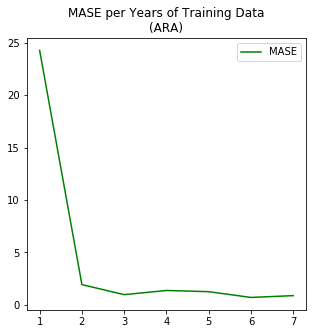

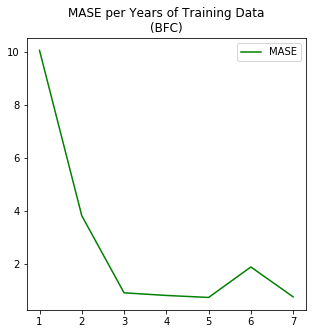

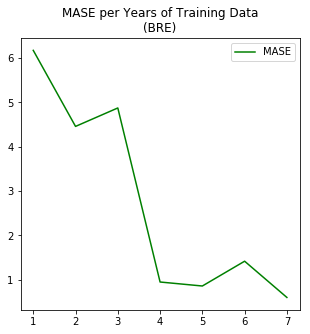

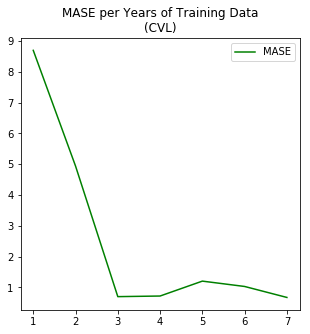

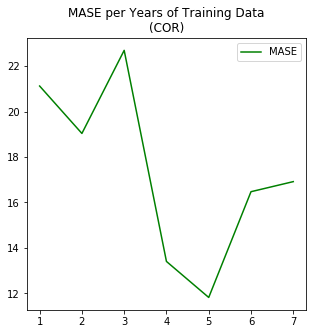

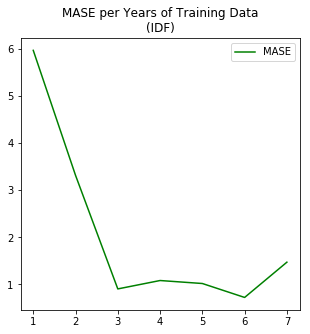

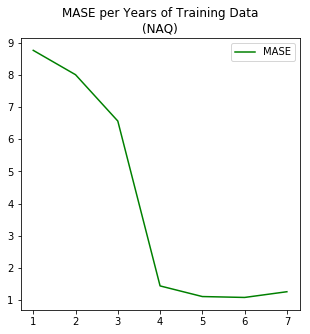

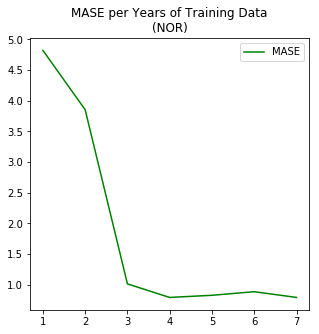

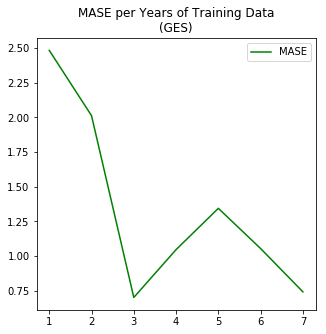

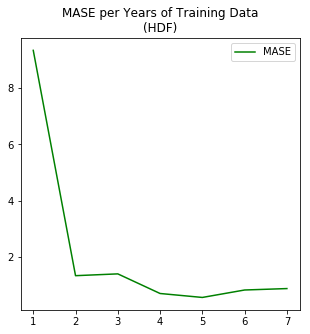

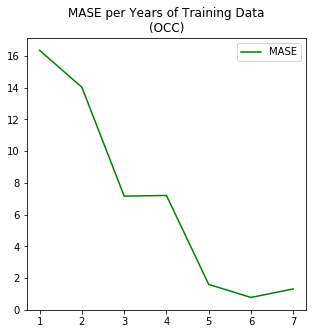

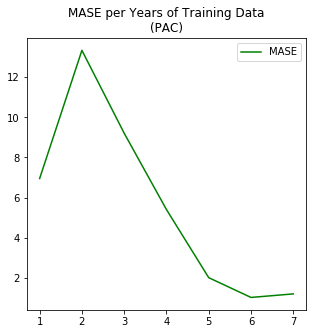

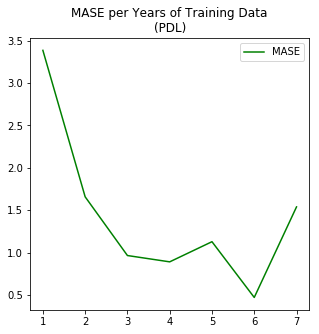

In [20]:
for region in regions:
        print("Region",region)
        for year in predicted_data[region]:
            print('Years of training data:', years_data[region][year])
            print('Predicted year:', year)
            print('MASE: %f' % all_smase[region][year])

        years = predicted_data[region]    
        fig, ax = plt.subplots(figsize=(5,5))
        x = [len(v) for k,v in years_data[region].items()]
        ax.plot(x, np.array([all_smase[region][index] for index in years]), label='MASE', color='green')
        ax.set_xticks(x)
        ax.set_xticklabels(x)
        ax.set_title('MASE per Years of Training Data' + '\n' + f'({region})')
        ax.legend()

        plt.savefig('CrossValidation_Prophet_MASE'+region+'.png')